In [1]:
#importando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# importando os dados
df = pd.read_csv('heart_disease_data.csv')

In [4]:
# analisando os dados
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NaN,DC


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.327367,6.369381,12.02,24.03,27.34,31.44,119.0
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.0
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.0
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.0


In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,212984,2,No,191207
Stroke,318683,2,No,306614
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

In [8]:
df.select_dtypes(include=['object']).isnull().sum()

HeartDisease                       0
Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
dtype: int64

In [9]:
#distribuição dos valores da variável alvo
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [10]:
# transformando a variável alvo para No = 0 e Yes = 1
df['HeartDisease'] = df['HeartDisease'].replace({'Yes': 1, 'No': 0})

In [11]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [12]:
292422 + 27373

319795

In [13]:
df['HeartDisease'].count()

319795

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

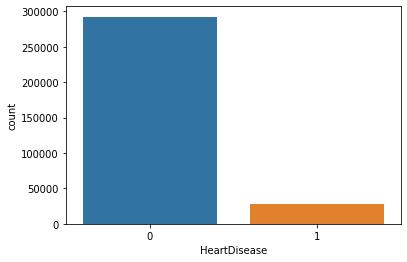

In [14]:
sns.countplot(data=df, x='HeartDisease')

Distribuição das variáveis e relação com a variável alvo 

variável BMI

<AxesSubplot:ylabel='Frequency'>

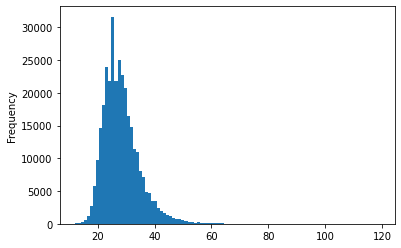

In [15]:
df['BMI'].plot(kind='hist', bins = 100)

<AxesSubplot:ylabel='BMI'>

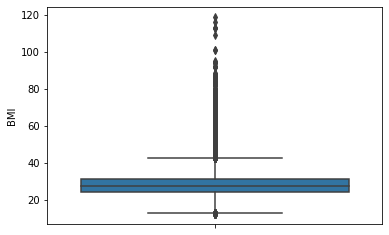

In [16]:
sns.boxplot(data=df, y='BMI')

In [17]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

IQR = Q3 - Q1

lower_bmi = Q1 - 1.5 * IQR
upper_bmi = Q3 + 1.5 * IQR

print(lower_bmi)
print(upper_bmi)

12.915000000000001
42.555


<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

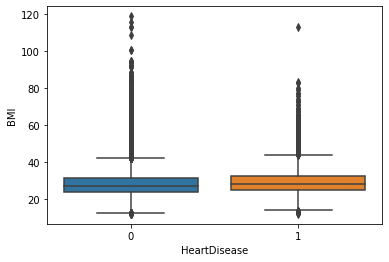

In [18]:
sns.boxplot(data=df, x='HeartDisease', y='BMI')

<AxesSubplot:ylabel='Frequency'>

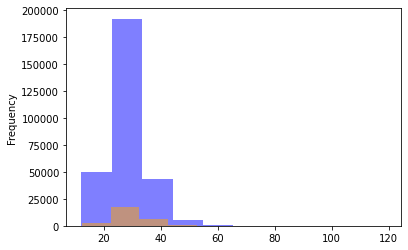

In [19]:
df[df.HeartDisease == 0]['BMI'].plot(kind='hist', alpha=.5, color="blue")
df[df.HeartDisease == 1]['BMI'].plot(kind='hist', alpha=.5, color="orange")

Variável SleepTime

<AxesSubplot:ylabel='Frequency'>

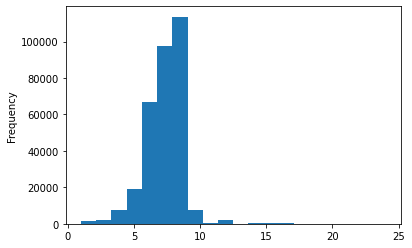

In [20]:
df['SleepTime'].plot(kind='hist', bins = 20)

<AxesSubplot:ylabel='SleepTime'>

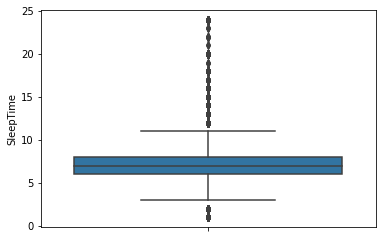

In [21]:
sns.boxplot(data=df, y='SleepTime')

In [22]:
Q1 = df['SleepTime'].quantile(0.25)
Q3 = df['SleepTime'].quantile(0.75)

IQR = Q3 - Q1

lower_SleepTime = Q1 - 1.5 * IQR
upper_SleepTime = Q3 + 1.5 * IQR

print(lower_SleepTime)
print(upper_SleepTime)

3.0
11.0


<AxesSubplot:xlabel='HeartDisease', ylabel='SleepTime'>

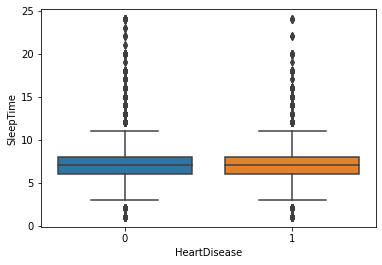

In [23]:
sns.boxplot(data=df, x='HeartDisease', y='SleepTime')

<AxesSubplot:ylabel='Frequency'>

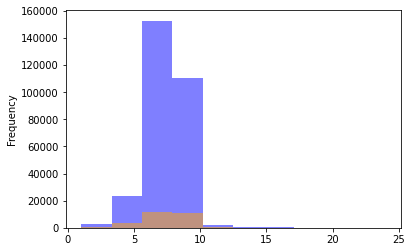

In [24]:
df[df.HeartDisease == 0]['SleepTime'].plot(kind='hist', alpha=.5, color="blue")
df[df.HeartDisease == 1]['SleepTime'].plot(kind='hist', alpha=.5, color="orange")

Variável PhysicalHealth

<AxesSubplot:ylabel='Frequency'>

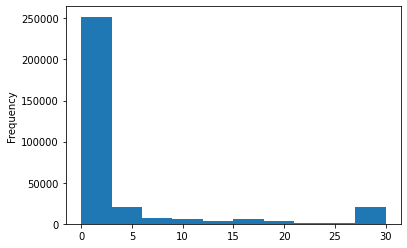

In [25]:
df['PhysicalHealth'].plot(kind='hist', bins = 10)                      

<AxesSubplot:ylabel='PhysicalHealth'>

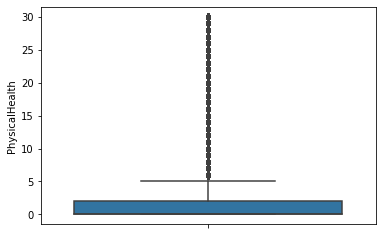

In [26]:
sns.boxplot(data=df, y='PhysicalHealth')

In [27]:
Q1 = df['PhysicalHealth'].quantile(0.25)
Q3 = df['PhysicalHealth'].quantile(0.75)

IQR = Q3 - Q1

lower_PhysicalHealth = Q1 - 1.5 * IQR
upper_PhysicalHealth = Q3 + 1.5 * IQR

print(lower_PhysicalHealth)
print(upper_PhysicalHealth)

-3.0
5.0


<AxesSubplot:xlabel='HeartDisease', ylabel='PhysicalHealth'>

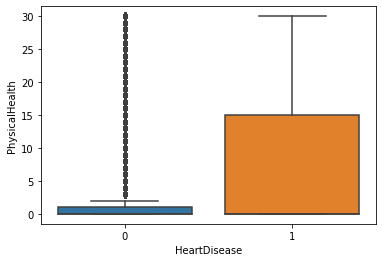

In [28]:
sns.boxplot(data=df, x='HeartDisease', y='PhysicalHealth')

<AxesSubplot:ylabel='Frequency'>

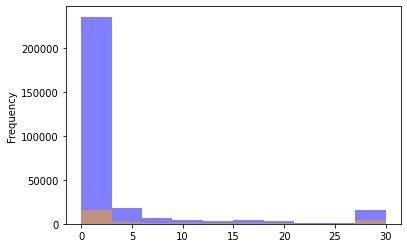

In [29]:
df[df.HeartDisease == 0]['PhysicalHealth'].plot(kind='hist', alpha=.5, color="blue")
df[df.HeartDisease == 1]['PhysicalHealth'].plot(kind='hist', alpha=.5, color="orange")

Variável MentalHealth

<AxesSubplot:ylabel='Frequency'>

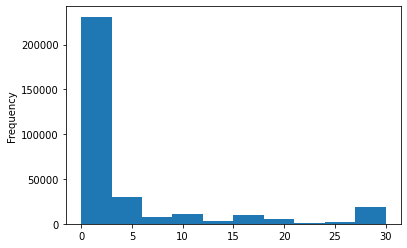

In [30]:
df['MentalHealth'].plot(kind='hist', bins = 10)

<AxesSubplot:ylabel='MentalHealth'>

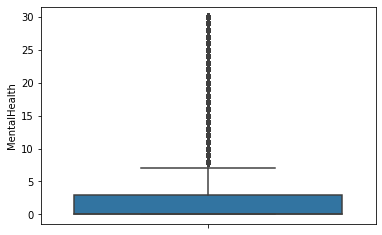

In [31]:
sns.boxplot(data=df, y='MentalHealth')

In [32]:
Q1 = df['MentalHealth'].quantile(0.25)
Q3 = df['MentalHealth'].quantile(0.75)

IQR = Q3 - Q1

lower_MentalHealth = Q1 - 1.5 * IQR
upper_MentalHealth = Q3 + 1.5 * IQR

print(lower_MentalHealth)
print(upper_MentalHealth)

-4.5
7.5


<AxesSubplot:xlabel='HeartDisease', ylabel='MentalHealth'>

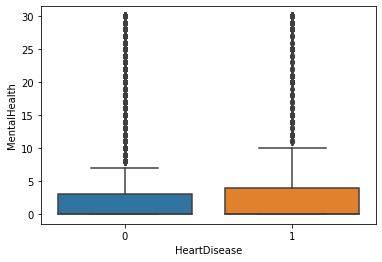

In [33]:
sns.boxplot(data=df, x='HeartDisease', y='MentalHealth')

<AxesSubplot:ylabel='Frequency'>

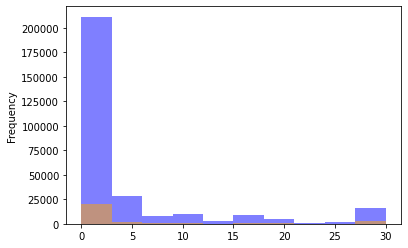

In [34]:
df[df.HeartDisease == 0]['MentalHealth'].plot(kind='hist', alpha=.5, color="blue")
df[df.HeartDisease == 1]['MentalHealth'].plot(kind='hist', alpha=.5, color="orange")

Todos os casos de HeartDisease positivo nas variáveis parecem acompanhar a frequencia populacional, nenhum outlayer com valor absurdo encontrado.

Variáveis Categóricas

In [35]:
df.select_dtypes(include=['object']).isnull().sum()

Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
dtype: int64

In [36]:
df['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

<AxesSubplot:xlabel='Smoking', ylabel='count'>

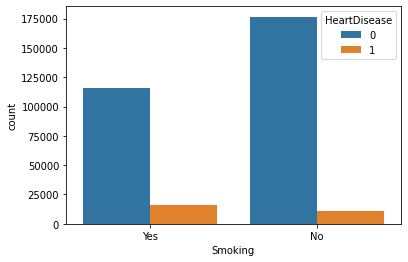

In [37]:
# transformando sim e não em 1 e 0 somente em variáveis que não contenham valor nulo.
#df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})
sns.countplot(data=df, x='Smoking', hue='HeartDisease')

In [38]:
pd.crosstab(df['Smoking'], df['HeartDisease'])

HeartDisease,0,1
Smoking,,
No,176551,11336
Yes,115871,16037


In [39]:
df['AlcoholDrinking'].value_counts()

No     191207
Yes     21777
Name: AlcoholDrinking, dtype: int64

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

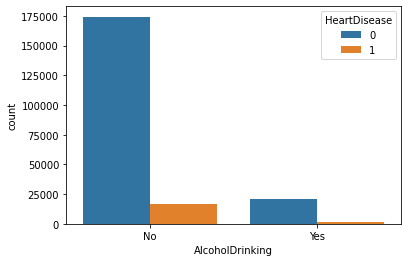

In [40]:
sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease')

In [41]:
pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])

HeartDisease,0,1
AlcoholDrinking,,
No,174343,16864
Yes,20636,1141


In [42]:
df['Stroke'].value_counts()

No     306614
Yes     12069
Name: Stroke, dtype: int64

<AxesSubplot:xlabel='Stroke', ylabel='count'>

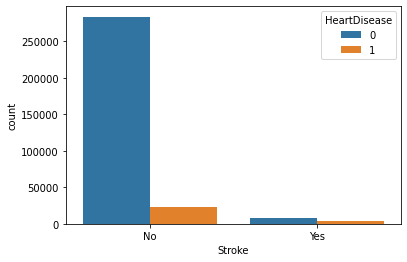

In [43]:
sns.countplot(data=df, x='Stroke', hue='HeartDisease')

In [44]:
pd.crosstab(df['Stroke'], df['HeartDisease'])

HeartDisease,0,1
Stroke,,
No,283708,22906
Yes,7680,4389


In [45]:
df['DiffWalking'].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

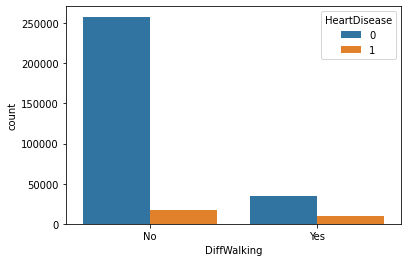

In [46]:
#df['DiffWalking'] = df['DiffWalking'].replace({'Yes': 1, 'No': 0})
sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')

In [47]:
pd.crosstab(df['DiffWalking'], df['HeartDisease'])

HeartDisease,0,1
DiffWalking,,
No,258040,17345
Yes,34382,10028


In [48]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

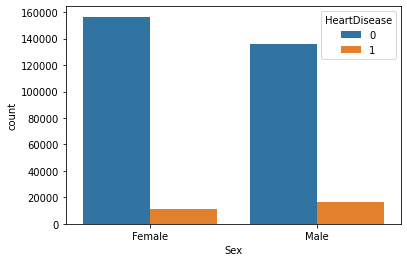

In [49]:
#df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})
sns.countplot(data=df, x='Sex', hue='HeartDisease')

In [50]:
pd.crosstab(df['Sex'], df['HeartDisease'])

HeartDisease,0,1
Sex,,
Female,156571,11234
Male,135851,16139


In [51]:
df['AgeCategory'].value_counts()

65-69          34143
60-64          33680
70-74          31060
55-59          29753
50-54          25378
80 or older    24150
45-49          21787
75-79          21478
18-24          21062
40-44          20999
35-39          20545
30-34          18746
25-29          16955
0                 59
Name: AgeCategory, dtype: int64

In [52]:
pd.crosstab(df['AgeCategory'], df['HeartDisease'])

HeartDisease,0,1
AgeCategory,,
0,54,5
18-24,20932,130
25-29,16822,133
30-34,18520,226
35-39,20249,296
40-44,20513,486
45-49,21043,744
50-54,23995,1383
55-59,27551,2202


<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

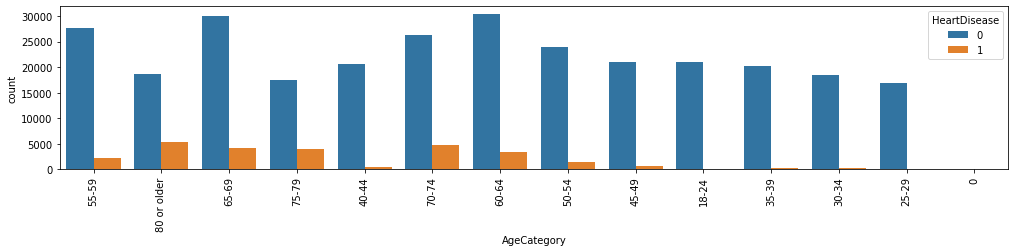

In [53]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease')

In [54]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [55]:
pd.crosstab(df['Race'], df['HeartDisease'])

HeartDisease,0,1
Race,,
American Indian/Alaskan Native,4660,542
Asian,7802,266
Black,21210,1729
Hispanic,26003,1443
Other,10042,886
White,222705,22507


<AxesSubplot:xlabel='Race', ylabel='count'>

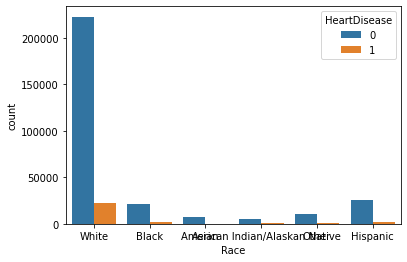

In [56]:
sns.countplot(data=df, x='Race', hue='HeartDisease')

In [57]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [58]:
pd.crosstab(df['Diabetic'], df['HeartDisease'])

HeartDisease,0,1
Diabetic,,
No,252134,17519
"No, borderline diabetes",5992,789
Yes,31845,8957
Yes (during pregnancy),2451,108


<AxesSubplot:xlabel='Diabetic', ylabel='count'>

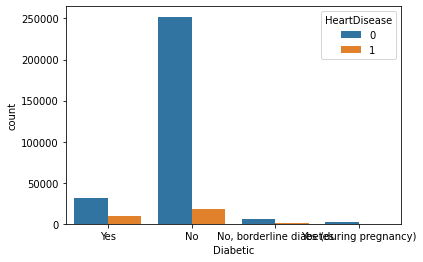

In [59]:
sns.countplot(data=df, x='Diabetic', hue='HeartDisease')

In [60]:
df['PhysicalActivity'].value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

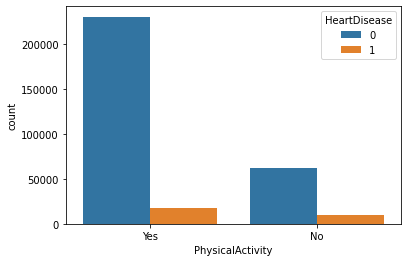

In [61]:
#df['PhysicalActivity'] = df['PhysicalActivity'].replace({'Yes': 1, 'No': 0})
sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')

In [62]:
pd.crosstab(df['PhysicalActivity'], df['HeartDisease'])

HeartDisease,0,1
PhysicalActivity,,
No,61954,9884
Yes,230468,17489


In [63]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [64]:
pd.crosstab(df['GenHealth'], df['HeartDisease'])

HeartDisease,0,1
GenHealth,,
Excellent,65342,1500
Fair,27593,7084
Good,83571,9558
Poor,7439,3850
Very good,108477,5381


<AxesSubplot:xlabel='GenHealth', ylabel='count'>

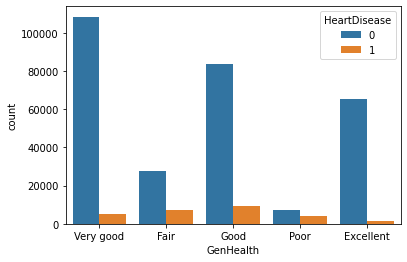

In [65]:
sns.countplot(data=df, x='GenHealth', hue='HeartDisease')

In [66]:
df['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

<AxesSubplot:xlabel='Asthma', ylabel='count'>

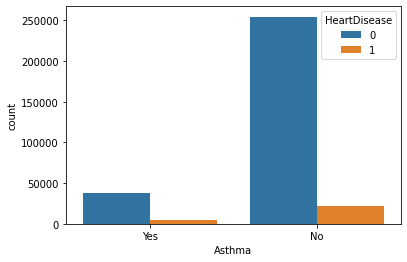

In [67]:
#df['Asthma'] = df['Asthma'].replace({'Yes': 1, 'No': 0})
sns.countplot(data=df, x='Asthma', hue='HeartDisease')

In [68]:
pd.crosstab(df['Asthma'], df['HeartDisease'])

HeartDisease,0,1
Asthma,,
No,254483,22440
Yes,37939,4933


In [69]:
df['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

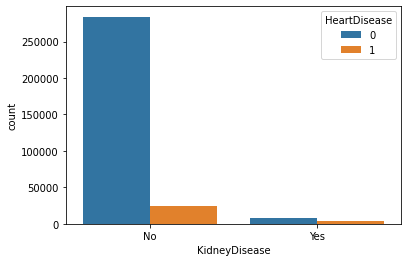

In [70]:
#df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0})
sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease')

In [71]:
pd.crosstab(df['KidneyDisease'], df['HeartDisease'])

HeartDisease,0,1
KidneyDisease,,
No,284098,23918
Yes,8324,3455


In [72]:
df['SkinCancer'].value_counts()

No     289627
Yes     29819
Name: SkinCancer, dtype: int64

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

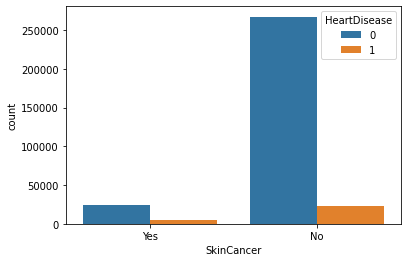

In [73]:
sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')

In [74]:
pd.crosstab(df['KidneyDisease'], df['HeartDisease'])

HeartDisease,0,1
KidneyDisease,,
No,284098,23918
Yes,8324,3455


In [75]:
df['HeartDisease_FamilyHistory'].value_counts()

No     32008
Yes     3255
Name: HeartDisease_FamilyHistory, dtype: int64

<AxesSubplot:xlabel='HeartDisease_FamilyHistory', ylabel='count'>

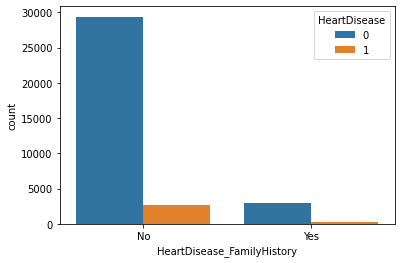

In [76]:
sns.countplot(data=df, x='HeartDisease_FamilyHistory', hue='HeartDisease')

In [77]:
pd.crosstab(df['HeartDisease_FamilyHistory'], df['HeartDisease'])

HeartDisease,0,1
HeartDisease_FamilyHistory,,
No,29360,2648
Yes,2966,289


In [78]:
pd.crosstab(df['State'], df['HeartDisease'])

HeartDisease,0,1
State,,
AK,5777,539
AL,5707,519
AR,5768,540
AZ,5821,557
CA,5810,570
CO,5693,563
CT,5644,507
DC,5765,526
DE,5707,501


<AxesSubplot:xlabel='State', ylabel='count'>

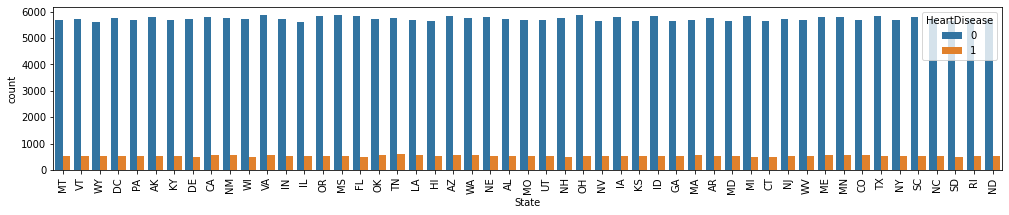

In [79]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='State', hue='HeartDisease')

a variável State parece não influir nos resultados

In [80]:
# função de para imprimir correlações entre as variáveis vista no módulo de data analytics
from dython import nominal

def plot_heatmap(data, title, fig_size=(12, 10)):
    """
    data: dataframe to get heatmap
    title: title of the plot
    fig_size: size of the figure
    output: heatmap
    """
    plt.figure(figsize = fig_size)
    plt.title(title, fontsize=20)

    sns.heatmap(data, 
                cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
                annot=True, annot_kws={"size": 8}, square=True)

In [81]:
corr = nominal.associations(df, compute_only = True)
corr_matrix = corr['corr']

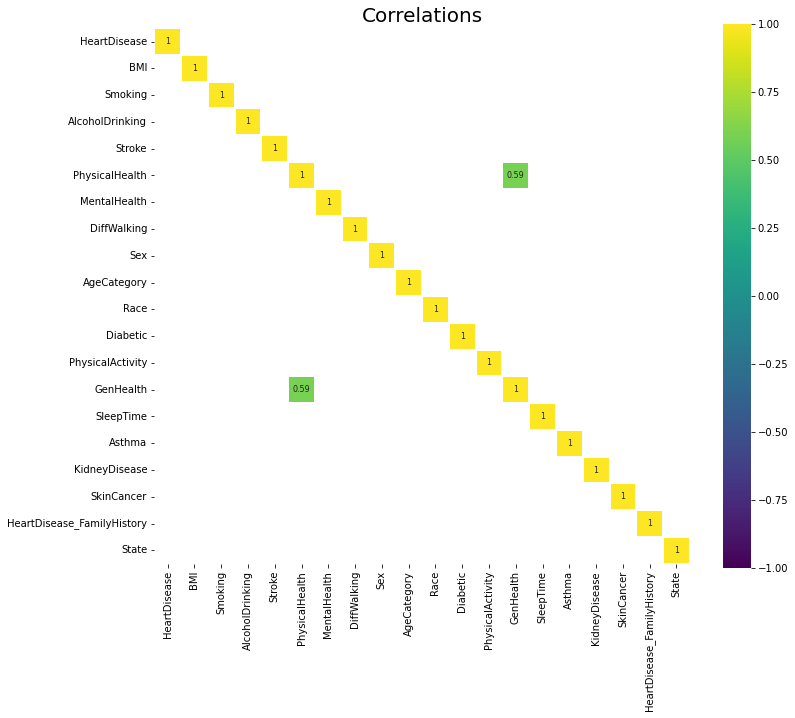

In [82]:
plot_heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)], "Correlations")

As variáveis possuem pouca correlação.

 ### DATA TRANSFORMATION


## Outliers
##### vamos utilizar o IQR para removê-los

Variável BMI

In [83]:
df = df[~((df['BMI'] < lower_bmi) | (df['BMI'] > upper_bmi))]

<AxesSubplot:ylabel='BMI'>

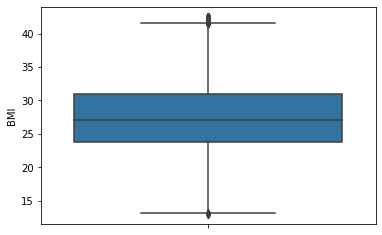

In [84]:
sns.boxplot(data=df, y='BMI')

Variável PhysicalHealth

In [85]:
df = df[~((df['PhysicalHealth'] < lower_PhysicalHealth) | (df['PhysicalHealth'] > upper_PhysicalHealth))]

<AxesSubplot:ylabel='PhysicalHealth'>

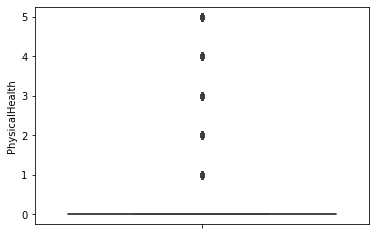

In [86]:
sns.boxplot(data=df, y='PhysicalHealth')

Variável MentalHealth

In [87]:
df = df[~((df['MentalHealth'] < lower_MentalHealth) | (df['MentalHealth'] > upper_MentalHealth))]

<AxesSubplot:ylabel='MentalHealth'>

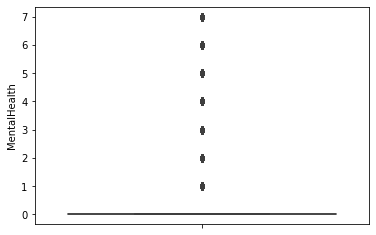

In [88]:
sns.boxplot(data=df, y='MentalHealth')

Variável SleepTime

In [89]:
df = df[~((df['SleepTime'] < lower_SleepTime) | (df['SleepTime'] > upper_SleepTime))]

<AxesSubplot:ylabel='SleepTime'>

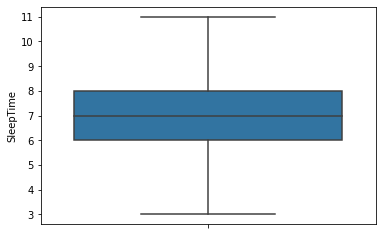

In [90]:
sns.boxplot(data=df, y='SleepTime')

In [91]:
df.select_dtypes(include=['object']).isnull().sum()

Smoking                            0
AlcoholDrinking                77357
Stroke                           787
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       258
HeartDisease_FamilyHistory    205678
State                              0
dtype: int64

In [92]:
df.select_dtypes(include=['number']).isnull().sum()

HeartDisease      0
BMI               0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
dtype: int64

Tratando valores nulos 

In [93]:
df['AlcoholDrinking'].fillna(value='NULO', inplace=True)

In [94]:
df['Stroke'].fillna(value='NULO', inplace=True)

In [95]:
df['SkinCancer'].fillna(value='NULO', inplace=True)

In [96]:
df['HeartDisease_FamilyHistory'].fillna(value='NULO', inplace=True)

In [97]:
df.select_dtypes(include=['object']).isnull().sum()

Smoking                       0
AlcoholDrinking               0
Stroke                        0
DiffWalking                   0
Sex                           0
AgeCategory                   0
Race                          0
Diabetic                      0
PhysicalActivity              0
GenHealth                     0
Asthma                        0
KidneyDisease                 0
SkinCancer                    0
HeartDisease_FamilyHistory    0
State                         0
dtype: int64

transformando as variáveis categóricas

In [98]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Smoking,231136,2,No,142906
AlcoholDrinking,231136,3,No,138807
Stroke,231136,3,No,224031
DiffWalking,231136,2,No,213621
Sex,231136,2,Male,116404
AgeCategory,231136,14,65-69,25526
Race,231136,6,White,179092
Diabetic,231136,4,No,200525
PhysicalActivity,231136,2,Yes,189668
GenHealth,231136,5,Very good,93006


## Vamos aplicar o one hot enconding as variáveis

In [99]:
df_encoded = pd.get_dummies(df, columns=['Sex','AgeCategory','Race','PhysicalActivity',
                                         'GenHealth','KidneyDisease','AlcoholDrinking',
                                         'HeartDisease_FamilyHistory','Stroke', 'Diabetic','SkinCancer','State',
                                         'Smoking','DiffWalking','Asthma'])

In [100]:
#df_encoded = df_encoded.drop(columns=['State'])

In [101]:
df_encoded.select_dtypes(include=['object']).isnull().sum()

Series([], dtype: float64)

In [102]:
# vamos normalizar as variáveis usando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = MinMaxScaler()
df_encoded_MMS = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [103]:
df_encoded_MMS

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex_Female,Sex_Male,AgeCategory_0,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,KidneyDisease_No,KidneyDisease_Yes,AlcoholDrinking_NULO,AlcoholDrinking_No,AlcoholDrinking_Yes,HeartDisease_FamilyHistory_NULO,HeartDisease_FamilyHistory_No,HeartDisease_FamilyHistory_Yes,Stroke_NULO,Stroke_No,Stroke_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),SkinCancer_NULO,SkinCancer_No,SkinCancer_Yes,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Smoking_No,Smoking_Yes,DiffWalking_No,DiffWalking_Yes,Asthma_No,Asthma_Yes
0,0.0,0.249155,0.0,0.0,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.379986,0.0,0.0,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.631170,1.0,0.0,0.750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.455713,0.0,0.0,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.937120,0.0,0.0,0.875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Selecionando as variáveis independentes e a dependente

In [104]:
y = df_encoded_MMS['HeartDisease'] # variável dependente

In [105]:
x = df_encoded_MMS
x.drop(columns=['HeartDisease'], inplace=True)

## Separando os datasets de treino e teste

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Regressão Logística

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.pipeline import make_pipeline


regressor = LogisticRegression(solver='liblinear', max_iter=1000)
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [108]:
y_pred = regressor.predict(X_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [110]:
print(f"Acurácia: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)

Acurácia: 0.93
Matriz de Confusão:
[[42857   166]
 [ 3024   181]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     43023
         1.0       0.52      0.06      0.10      3205

    accuracy                           0.93     46228
   macro avg       0.73      0.53      0.53     46228
weighted avg       0.91      0.93      0.90     46228



In [111]:
y_pred = regressor.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


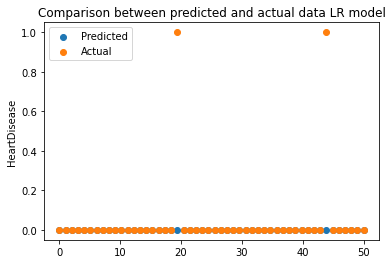

In [112]:
y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("HeartDisease")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()

A precisão do modelo não está boa e o modelo não conseguiu lidar bem com os falsos negativos.

### Decision tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [114]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

In [115]:
dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

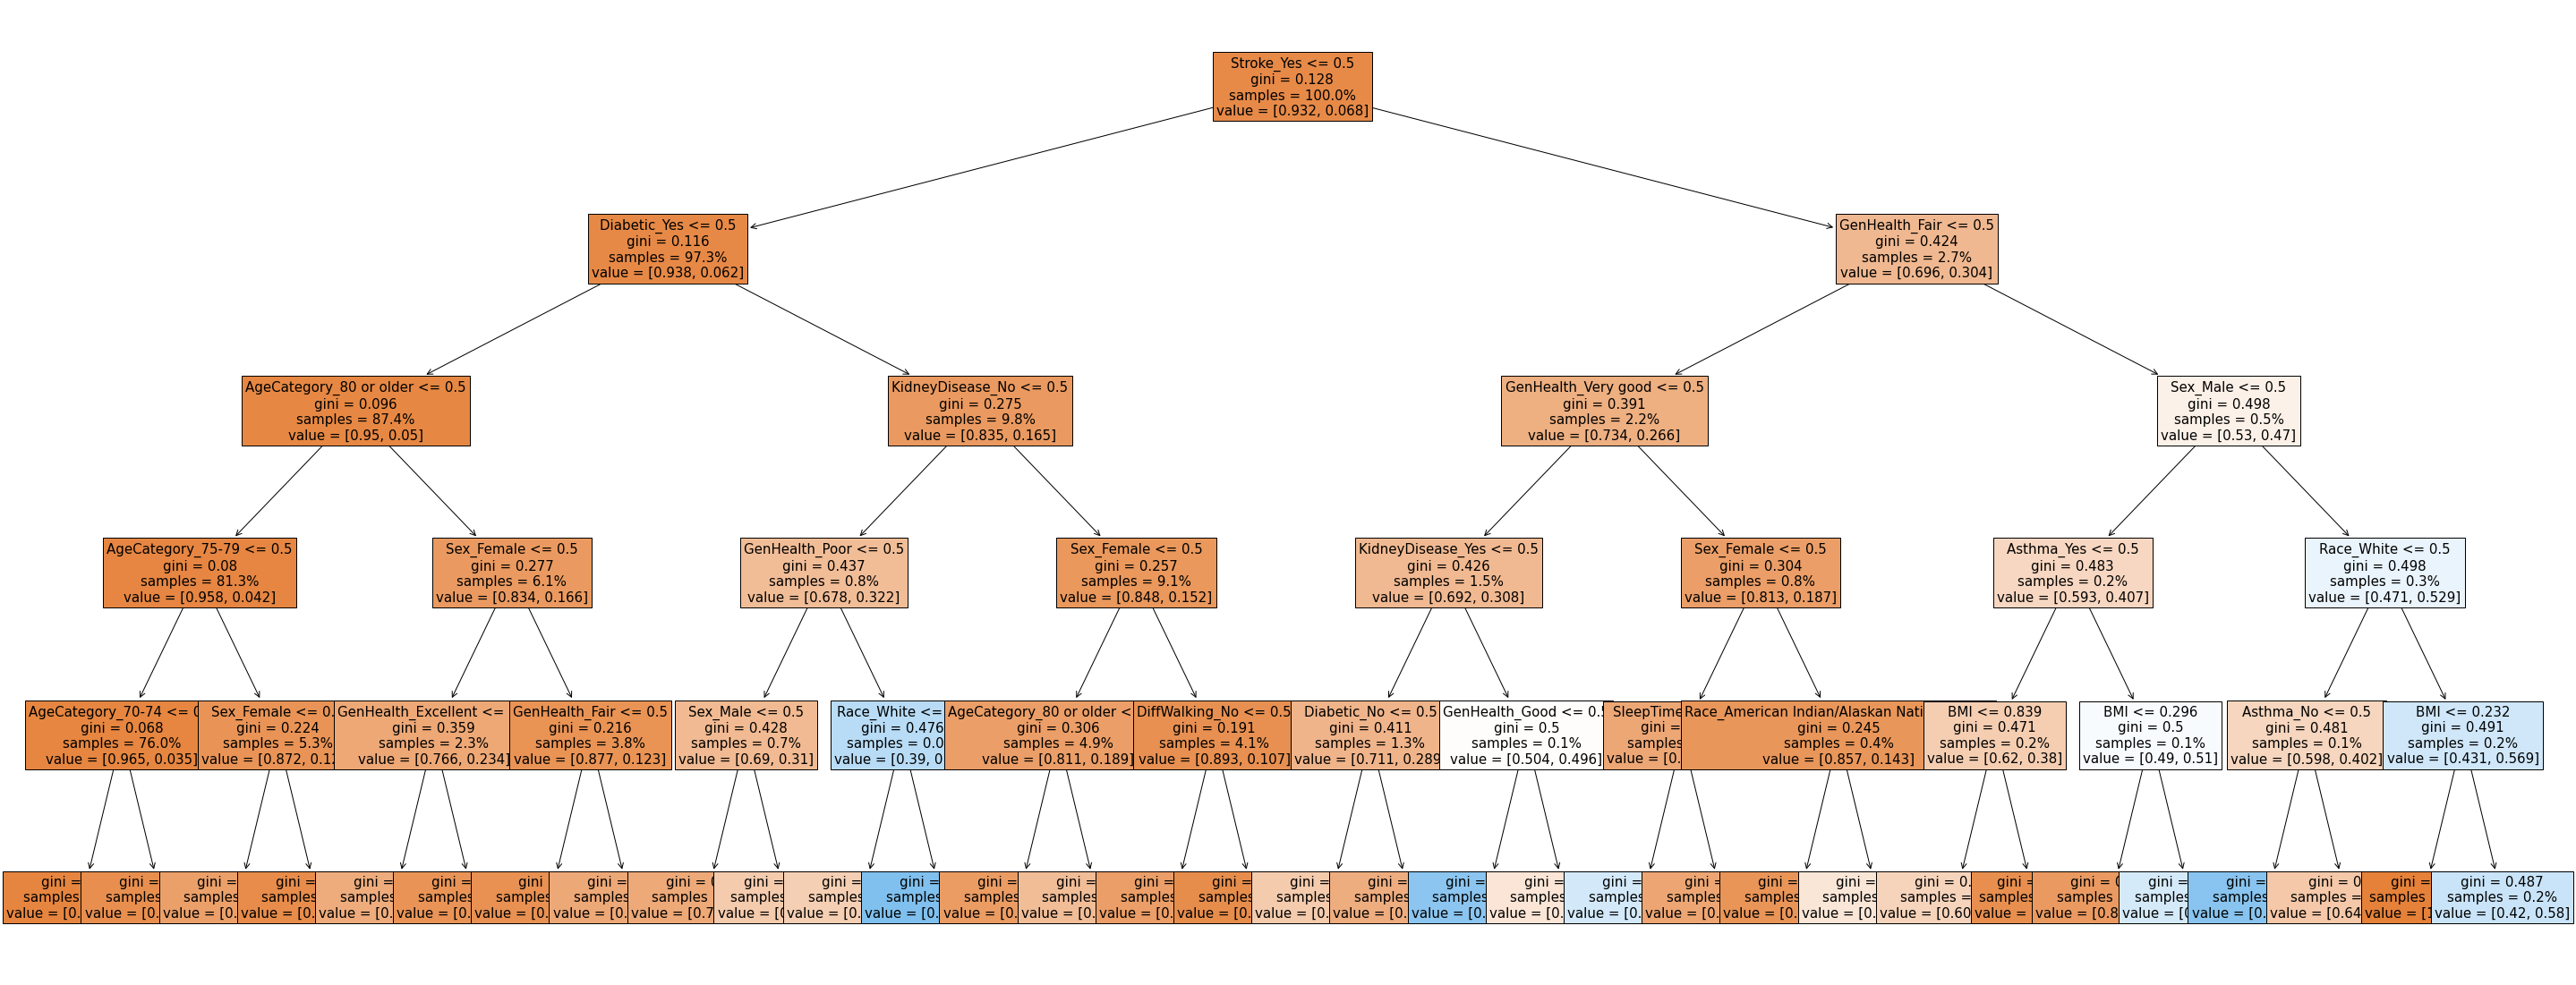

In [116]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt, 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               feature_names = X_test.columns);

Text(0.5, 0, 'Importância das variáveis')

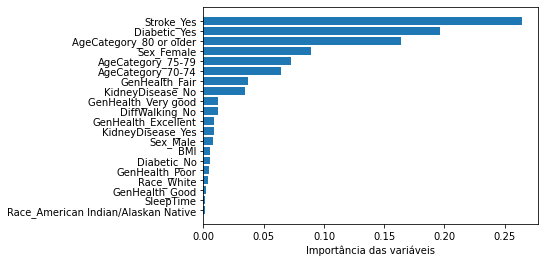

In [117]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-20:], dt.feature_importances_[sorted_idx][-20:])
plt.xlabel("Importância das variáveis")


In [118]:
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['HeartDiseasePrediction'])

In [119]:
y_train_pred

,HeartDiseasePrediction
205540,0.0
34035,0.0
106224,0.0
84002,0.0
60119,0.0
...,...
119879,0.0
103694,0.0
131932,0.0
146867,0.0


In [120]:
y_train = pd.DataFrame(y_train)
y_train

,HeartDisease
205540,0.0
34035,0.0
106224,0.0
84002,0.0
60119,0.0
...,...
119879,0.0
103694,0.0
131932,0.0
146867,0.0


In [121]:
results_df = y_train.join(y_train_pred, how= 'inner')
results_df

,HeartDisease,HeartDiseasePrediction
205540,0.0,0.0
34035,0.0,0.0
106224,0.0,0.0
84002,0.0,0.0
60119,0.0,0.0
...,...,...
119879,0.0,0.0
103694,0.0,0.0
131932,0.0,0.0
146867,0.0,0.0


In [122]:
results_df['Success'] = (results_df['HeartDisease'] == results_df['HeartDiseasePrediction']).astype(int)

In [123]:
results_df.head(10)

,HeartDisease,HeartDiseasePrediction,Success
205540,0.0,0.0,1
34035,0.0,0.0,1
106224,0.0,0.0,1
84002,0.0,0.0,1
60119,0.0,0.0,1
83101,0.0,0.0,1
20551,0.0,0.0,1
99119,1.0,0.0,0
78985,0.0,0.0,1
174302,1.0,0.0,0


In [124]:
results_df['Success'].count()

184908

In [125]:
results_df['Success'].sum()

172359

In [126]:
results_df['Success'].mean()

0.9321338178986307

In [127]:
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 172359 from a total of 184908. The accuracy is 0.9321338178986307.


In [128]:
confusion_matrix = pd.crosstab(results_df['HeartDisease'], results_df['HeartDiseasePrediction'])

In [129]:
confusion_matrix

HeartDiseasePrediction,0.0,1.0
HeartDisease,,
0.0,172020,225
1.0,12324,339


In [130]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [131]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy

0.9321338178986307

In [132]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

In [133]:
print('precision: ',precision)
print('recall: ',recall)
print('f1_score:',f1_score)

precision:  0.601063829787234
recall:  0.026770907367922293
f1_score: 0.05125878884100703


 A precisão do modelo não está boa e o modelo não conseguiu lidar bem com os falsos negativos
 vamos aumentar o número da profundidade da árvore

In [135]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
# vamos descobrir qual é a profundidade máxima
max_depth = clf.get_depth()
print(f"A profundidade máxima da árvore de decisão é: {max_depth}")

A profundidade máxima da árvore de decisão é: 71


In [137]:
dt = DecisionTreeClassifier(max_depth=60, random_state=42)

In [138]:
dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=60, random_state=42)

Text(0.5, 0, 'Importância das variáveis')

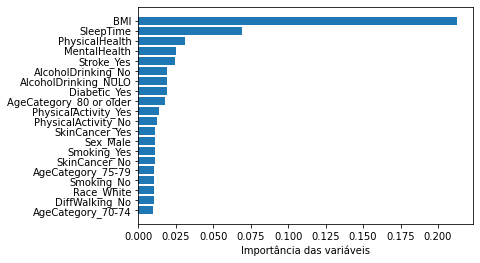

In [139]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-20:], dt.feature_importances_[sorted_idx][-20:])
plt.xlabel("Importância das variáveis")

In [140]:
# Não plotamos a árvore pela dificuldade de visualização
# podemos perceber que a importância da variável BMI mudou significativamente, 

In [141]:
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['HeartDiseasePrediction'])
y_train = pd.DataFrame(y_train)
results_df = y_train.join(y_train_pred, how= 'inner')
results_df['Success'] = (results_df['HeartDisease'] == results_df['HeartDiseasePrediction']).astype(int)
results_df.head(10)

,HeartDisease,HeartDiseasePrediction,Success
205540,0.0,0.0,1
34035,0.0,0.0,1
106224,0.0,0.0,1
84002,0.0,0.0,1
60119,0.0,0.0,1
83101,0.0,0.0,1
20551,0.0,0.0,1
99119,1.0,1.0,1
78985,0.0,0.0,1
174302,1.0,1.0,1


In [142]:
results_df['Success'].count()

184908

In [143]:
results_df['Success'].sum()

184881

In [144]:
results_df['Success'].mean()

0.9998539814394185

In [145]:
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 184881 from a total of 184908. The accuracy is 0.9998539814394185.


In [146]:
confusion_matrix = pd.crosstab(results_df['HeartDisease'], results_df['HeartDiseasePrediction'])

In [147]:
confusion_matrix

HeartDiseasePrediction,0.0,1.0
HeartDisease,,
0.0,172245,0
1.0,27,12636


In [148]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('precision: ',precision)
print('recall: ',recall)
print('f1_score:',f1_score)

precision:  1.0
recall:  0.997867803837953
f1_score: 0.9989327641408752


A precisão, o recall e o f1_score aumentaram considerávelmente, ao passo qua aumentamos a profundidade da árvore, o modelo está classificando adequadamente

 # RandomForestClassifier

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
#y_train = y_train.values.ravel()
rf_model = RandomForestClassifier(n_estimators=10, max_depth=60, random_state=42)
rf_model.fit(X_train, y_train)

c:\users\andre\desktop\nds\dctp\venv_test2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=60, n_estimators=10, random_state=42)

In [152]:
y_train_pred = pd.DataFrame(rf_model.predict(X_train), index=y_train.index, columns=['HeartDiseasePrediction'])
y_train = pd.DataFrame(y_train)
results_df = y_train.join(y_train_pred, how= 'inner')
results_df['Success'] = (results_df['HeartDisease'] == results_df['HeartDiseasePrediction']).astype(int)
results_df.head(10)

,HeartDisease,HeartDiseasePrediction,Success
205540,0.0,0.0,1
34035,0.0,0.0,1
106224,0.0,0.0,1
84002,0.0,0.0,1
60119,0.0,0.0,1
83101,0.0,0.0,1
20551,0.0,0.0,1
99119,1.0,1.0,1
78985,0.0,0.0,1
174302,1.0,1.0,1


In [153]:
results_df['Success'].count()

184908

In [154]:
results_df['Success'].sum()

182884

In [155]:
results_df['Success'].mean()

0.9890540160512254

In [156]:
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 182884 from a total of 184908. The accuracy is 0.9890540160512254.


In [157]:
confusion_matrix = pd.crosstab(results_df['HeartDisease'], results_df['HeartDiseasePrediction'])
confusion_matrix 

HeartDiseasePrediction,0.0,1.0
HeartDisease,,
0.0,172224,21
1.0,2003,10660


In [158]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('precision: ',precision)
print('recall: ',recall)
print('f1_score:',f1_score)

precision:  0.9980338919576819
recall:  0.841822632867409
f1_score: 0.9132967786154901


O desmpenho da RandomForestClassifier aumenta conforme aumentamos os parâmetros n_estimators e max_depth,
bem similar a Decision tree que se saiu melhor confome aumentamos a profundidade.